

#Download the dataset and merge


In [33]:
#Assuming bulk sequencing and sample from multiple regions of tumor was taken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from zipfile import ZipFile

# specifying the zip file name
file_name = "coding_assessment.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()

    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
sample-information.tsv                         2019-01-14 10:33:38         3799
__MACOSX/                                      2019-01-14 10:39:08            0
__MACOSX/._sample-information.tsv              2019-01-14 10:33:38          176
mafs/                                          2019-01-14 10:38:58            0
mafs/Patient-36.somatic.snvs.maf               2019-01-14 10:33:38        29353
mafs/Patient-1.somatic.snvs.maf                2019-01-14 10:33:36        28776
mafs/Patient-17.somatic.snvs.maf               2019-01-14 10:33:38        93605
mafs/Patient-29.somatic.snvs.maf               2019-01-14 10:33:38        69578
mafs/Patient-47.somatic.snvs.maf               2019-01-14 10:33:38        10995
mafs/Patient-22.somatic.snvs.maf               2019-01-14 10:33:38        36076
mafs/Patient-43.somatic.snvs.maf               2019-01-14 10:33:38        14626
mafs/Patient-26.somatic.snvs.maf        

In [35]:
# Directory containing .maf files
import glob

# List to store dataframes from each .maf file
dfs = []
i=0
# Iterate through each .maf file in the directory
for filename in glob.glob('mafs/*'):
    if filename.endswith('.maf'):
        # Read .maf file into a dataframe
        df = pd.read_csv(filename, sep='\t', comment='#', low_memory=False)
        i+=1
        # Append the dataframe to the list

        dfs.append(df)


# Concatenate dataframes into a single dataframe
merged_df = pd.concat(dfs, ignore_index=True)
# print(i)
# Display the merged dataframe
print(merged_df)

      Hugo_Symbol Chromosome  Start_position  End_position  \
0         ANKRD26         10        27382653      27382653   
1          ZFYVE9          1        52704470      52704470   
2           CMTR2         16        71317697      71317697   
3         SLC34A1          5       176823810     176823810   
4         MAP3K13          3       185181390     185181390   
...           ...        ...             ...           ...   
15668        LCAT         16        67974012      67974012   
15669    IVNS1ABP          1       185278573     185278573   
15670       LIMA1         12        50616193      50616193   
15671     CCDC106         19        56160650      56160650   
15672     CEACAM5         19        42213660      42213660   

      Variant_Classification Variant_Type Reference_Allele Tumor_Seq_Allele1  \
0                     Silent          SNP                G                 G   
1          Missense_Mutation          SNP                G                 G   
2              

In [36]:
merged_df.head()

,Hugo_Symbol,Chromosome,Start_position,End_position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Protein_Change,t_alt_count,t_ref_count
0,ANKRD26,10,27382653,27382653,Silent,SNP,G,G,A,Patient-5-Tumor,Patient-5-Normal,p.L106L,6,61
1,ZFYVE9,1,52704470,52704470,Missense_Mutation,SNP,G,G,A,Patient-5-Tumor,Patient-5-Normal,p.D461N,6,125
2,CMTR2,16,71317697,71317697,Silent,SNP,C,C,T,Patient-5-Tumor,Patient-5-Normal,p.L709L,5,41
3,SLC34A1,5,176823810,176823810,Silent,SNP,G,G,A,Patient-5-Tumor,Patient-5-Normal,p.Q417Q,25,54
4,MAP3K13,3,185181390,185181390,Missense_Mutation,SNP,G,G,A,Patient-5-Tumor,Patient-5-Normal,p.G444E,5,136


In [37]:
merged_df.info()
#we know that
#the last two columns Read depth supporting the reference and variant allele

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15673 entries, 0 to 15672
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Hugo_Symbol                  15673 non-null  object
 1   Chromosome                   15673 non-null  object
 2   Start_position               15673 non-null  int64 
 3   End_position                 15673 non-null  int64 
 4   Variant_Classification       15673 non-null  object
 5   Variant_Type                 15673 non-null  object
 6   Reference_Allele             15673 non-null  object
 7   Tumor_Seq_Allele1            15673 non-null  object
 8   Tumor_Seq_Allele2            15673 non-null  object
 9   Tumor_Sample_Barcode         15673 non-null  object
 10  Matched_Norm_Sample_Barcode  15673 non-null  object
 11  Protein_Change               15464 non-null  object
 12  t_alt_count                  15673 non-null  int64 
 13  t_ref_count                  15

In [38]:
merged_df.t_alt_count.describe() #minimum is low

count    15673.000000
mean        19.671792
std         22.306744
min          2.000000
25%          7.000000
50%         13.000000
75%         25.000000
max        503.000000
Name: t_alt_count, dtype: float64

In [39]:
merged_df.t_ref_count.describe()
#Maybe we should be filtering these out but depending on our situation.

count    15673.000000
mean        87.602374
std         85.678126
min          0.000000
25%         34.000000
50%         64.000000
75%        114.000000
max       1383.000000
Name: t_ref_count, dtype: float64

In [40]:
#We could also calculate VAF and filter further if needed....

# merged_df = merged_df[(merged_df['t_ref_count']>4) & (merged_df['t_alt_count']>4)]

In [41]:
merged_df.nunique() #No. of Unique values in all features

Hugo_Symbol                     8612
Chromosome                        47
Start_position                 15459
End_position                   15459
Variant_Classification             4
Variant_Type                       1
Reference_Allele                   4
Tumor_Seq_Allele1                  4
Tumor_Seq_Allele2                  4
Tumor_Sample_Barcode              50
Matched_Norm_Sample_Barcode       50
Protein_Change                 12997
t_alt_count                      187
t_ref_count                      514
dtype: int64

In [42]:
merged_df['Variant_Classification'].unique()

array(['Silent', 'Missense_Mutation', 'Nonsense_Mutation', 'Splice_Site'],
      dtype=object)

In [43]:
merged_df['Chromosome'].unique() # MT Chromosome -> mitochondria

array(['10', '1', '16', '5', '3', '2', '21', '20', '6', '8', '11', '4',
       '17', '19', '7', '9', '15', '12', 'X', '22', '14', 'Y', '13', '18',
       16, 22, 10, 1, 19, 17, 3, 12, 4, 2, 11, 14, 6, 9, 21, 5, 15, 7, 20,
       13, 8, 18, 'MT'], dtype=object)

#Subset for mutations that are not of the Variant Classification “Silent”

In [44]:
filtered_df = merged_df[merged_df['Variant_Classification'] != 'Silent']

In [45]:
filtered_df['Variant_Classification'].unique()

array(['Missense_Mutation', 'Nonsense_Mutation', 'Splice_Site'],
      dtype=object)

In [46]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11247 entries, 1 to 15669
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Hugo_Symbol                  11247 non-null  object
 1   Chromosome                   11247 non-null  object
 2   Start_position               11247 non-null  int64 
 3   End_position                 11247 non-null  int64 
 4   Variant_Classification       11247 non-null  object
 5   Variant_Type                 11247 non-null  object
 6   Reference_Allele             11247 non-null  object
 7   Tumor_Seq_Allele1            11247 non-null  object
 8   Tumor_Seq_Allele2            11247 non-null  object
 9   Tumor_Sample_Barcode         11247 non-null  object
 10  Matched_Norm_Sample_Barcode  11247 non-null  object
 11  Protein_Change               11038 non-null  object
 12  t_alt_count                  11247 non-null  int64 
 13  t_ref_count                  11

In [47]:
filtered_df.isna().sum(axis=0) # There are 209 NaN values....
#If needed, we can spend more time based on our data and try to estimate what they may be

Hugo_Symbol                      0
Chromosome                       0
Start_position                   0
End_position                     0
Variant_Classification           0
Variant_Type                     0
Reference_Allele                 0
Tumor_Seq_Allele1                0
Tumor_Seq_Allele2                0
Tumor_Sample_Barcode             0
Matched_Norm_Sample_Barcode      0
Protein_Change                 209
t_alt_count                      0
t_ref_count                      0
dtype: int64

In [48]:
filtered_df = filtered_df.dropna()
filtered_df['Protein_Change'].isna().sum(axis=0)

0

In [49]:
filtered_df.nunique()

Hugo_Symbol                     6834
Chromosome                        46
Start_position                 10873
End_position                   10873
Variant_Classification             3
Variant_Type                       1
Reference_Allele                   4
Tumor_Seq_Allele1                  4
Tumor_Seq_Allele2                  4
Tumor_Sample_Barcode              50
Matched_Norm_Sample_Barcode       50
Protein_Change                  9563
t_alt_count                      161
t_ref_count                      479
dtype: int64

#Find the 15 most common mutations
* Most commonly mutated genes based on all mutations combined from samples

* Most commonly mutated proteins across all mutations combined from samples

* We could calculate the most mutated genes per patient per group

* We could extend to most common mutated genes and the associated mutated proteins

In [50]:
top_15_protein_mutation = filtered_df['Protein_Change'].value_counts().head(15).index.tolist()
top_15_protein_mutation

['p.S1289A',
 'p.E545K',
 'p.S57L',
 'p.E301K',
 'p.E70K',
 'p.E338K',
 'p.E352K',
 'p.E53K',
 'p.I97M',
 'p.S330F',
 'p.E315K',
 'p.S109L',
 'p.E29K',
 'p.E109K',
 'p.D64N']

<Axes: xlabel='Gene', ylabel='Counts'>

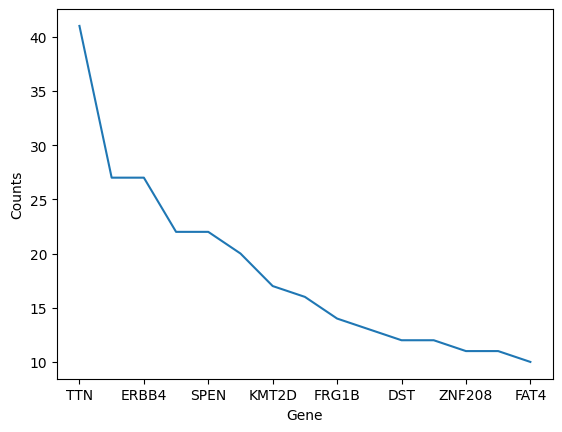

In [51]:
filtered_df['Hugo_Symbol'].value_counts().head(15).plot(ylabel = 'Counts', xlabel = 'Gene')

In [52]:
#Here we calculate the top 15 genes based with most mutations with individual patient bias
top_15_gene_mutation = filtered_df['Hugo_Symbol'].value_counts().head(15).index.tolist()
print(top_15_gene_mutation)

['TTN', 'TP53', 'ERBB4', 'MUC16', 'SPEN', 'KMT2C', 'KMT2D', 'ERBB3', 'FRG1B', 'ZNF91', 'DST', 'SYNE1', 'ZNF208', 'TYRO3', 'FAT4']


In [53]:
#Here we calculate the top 15 genes based removing individual patient bias
#The 5 genes SPEN, KMT2C, ZNF91, DST, TYRO3 are dominant in certain groups of patients
#and should be further evaluated

top_15_gene_mutation = filtered_df.drop_duplicates(['Tumor_Sample_Barcode','Hugo_Symbol'])['Hugo_Symbol'].value_counts().head(15).index.tolist()
print(top_15_gene_mutation)

['TTN', 'TP53', 'MUC16', 'ERBB4', 'KMT2D', 'ERBB3', 'FRG1B', 'ZNF208', 'ERCC2', 'PIK3CA', 'FAT4', 'SYNE1', 'RB1', 'ZNF844', 'PDE4DIP']


**We could further Analyze if there are some common proteins among top genes

**We could further analyze to which patient they belong, in both responders and non-responders

In [54]:
# df_a = filtered_df[filtered_df['Hugo_Symbol'].isin(top_15_gene_mutation)]
# df_a

In [55]:
#Checking if any unknowns are in symbol...

filtered_df[filtered_df['Hugo_Symbol']=='Unknown'].value_counts()

Series([], dtype: int64)

In [56]:
# col = ['Hugo_Symbol','Protein_Change']
# df = filtered_df[col]
# df['Mutations_Protein_wise'] = df['Protein_Change'].value_counts().to_frame()
# df.head()

In [57]:

# # Change code a bit for plotting if needed

# x_column = 'Hugo_Symbol'
# y_column = 'Protein_Change'

# # Plot the lines
# plt.figure(figsize=(10, 6))
# plt.plot(filtered_df[x_column], filtered_df[y_column], label='Most common AA mutations', marker='o')

# # Add labels and title
# plt.xlabel('Patient ID')
# plt.ylabel('Mutations per Mb')
# plt.title('Line Plot of Mutations per Mb for Silent and Nonsynonymous Mutations')
# plt.legend()
# plt.grid(True)

# # Show the plot
# plt.show()

#Perform a statistical test to explore if any mutated genes are enriched in patients who either responded or not.

*Erichment comparison between Responders and Non-responders

* This can be done at gene level with atleast a single mutation present in Response or Non-response patients.

* We might be able to add some weightage to consider number of mutations level present in each gene in Response or Non-response patients.

In [58]:
# Path to the sample information file
path = '/content/sample-information.tsv'

# Read the sample information into a DataFrame
df1 = pd.read_csv(path, sep='\t')

# Display the first few rows of the DataFrame
print(df1.head())

  Patient_ID Tumor_Sample_Barcode Matched_Norm_Sample_Barcode       Response  \
0  Patient-0      Patient-0-Tumor            Patient-0-Normal  Non-Responder   
1  Patient-1      Patient-1-Tumor            Patient-1-Normal      Responder   
2  Patient-2      Patient-2-Tumor            Patient-2-Normal      Responder   
3  Patient-3      Patient-3-Tumor            Patient-3-Normal  Non-Responder   
4  Patient-4      Patient-4-Tumor            Patient-4-Normal      Responder   

   Silent_mutations_per_Mb  Nonsynonymous_mutations_per_Mb  Mutations_per_Mb  
0                     2.87                            6.77              9.64  
1                     1.92                            6.14              8.06  
2                     1.32                            2.84              4.16  
3                     1.78                            5.00              6.78  
4                     4.93                           10.50             15.43  


In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient_ID                      50 non-null     object 
 1   Tumor_Sample_Barcode            50 non-null     object 
 2   Matched_Norm_Sample_Barcode     50 non-null     object 
 3   Response                        50 non-null     object 
 4   Silent_mutations_per_Mb         50 non-null     float64
 5   Nonsynonymous_mutations_per_Mb  50 non-null     float64
 6   Mutations_per_Mb                50 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.9+ KB


In [60]:
df1.head()

,Patient_ID,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Response,Silent_mutations_per_Mb,Nonsynonymous_mutations_per_Mb,Mutations_per_Mb
0,Patient-0,Patient-0-Tumor,Patient-0-Normal,Non-Responder,2.87,6.77,9.64
1,Patient-1,Patient-1-Tumor,Patient-1-Normal,Responder,1.92,6.14,8.06
2,Patient-2,Patient-2-Tumor,Patient-2-Normal,Responder,1.32,2.84,4.16
3,Patient-3,Patient-3-Tumor,Patient-3-Normal,Non-Responder,1.78,5.00,6.78
4,Patient-4,Patient-4-Tumor,Patient-4-Normal,Responder,4.93,10.50,15.43


In [61]:
df1.describe()

,Silent_mutations_per_Mb,Nonsynonymous_mutations_per_Mb,Mutations_per_Mb
count,50.0000,50.000000,50.000000
mean,2.3176,6.066200,8.383550
std,2.2190,4.759772,6.951887
min,0.0300,0.120000,0.152500
25%,0.8400,2.840000,3.736750
50%,1.5700,4.220000,5.735000
75%,3.0050,7.972500,10.977500
max,10.6000,20.800000,31.400000


In [62]:
df1.nunique()

Patient_ID                        50
Tumor_Sample_Barcode              50
Matched_Norm_Sample_Barcode       50
Response                           2
Silent_mutations_per_Mb           43
Nonsynonymous_mutations_per_Mb    47
Mutations_per_Mb                  49
dtype: int64

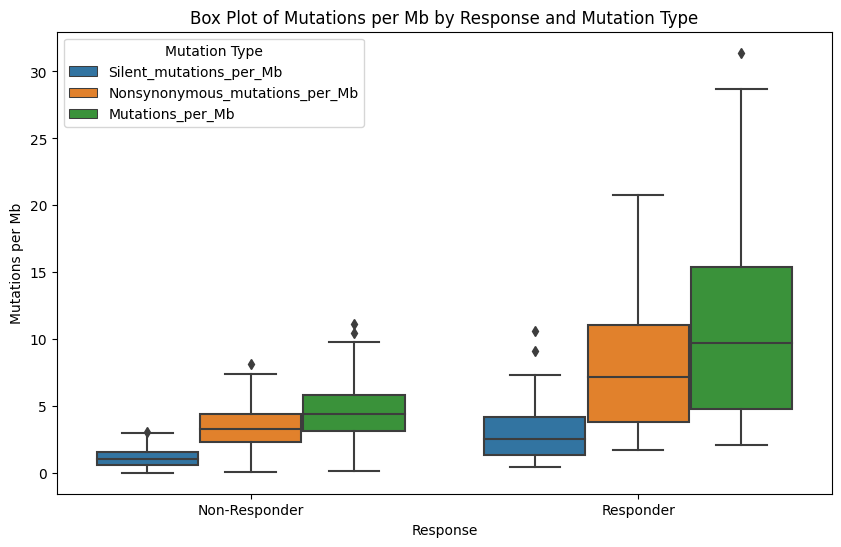

In [63]:
melted_df = pd.melt(df1, id_vars=['Response'], value_vars=['Silent_mutations_per_Mb', 'Nonsynonymous_mutations_per_Mb', 'Mutations_per_Mb'],
                    var_name='Mutation Type', value_name='Mutations per Mb')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Mutations per Mb', hue='Mutation Type', data=melted_df)
plt.title('Box Plot of Mutations per Mb by Response and Mutation Type')
plt.show()

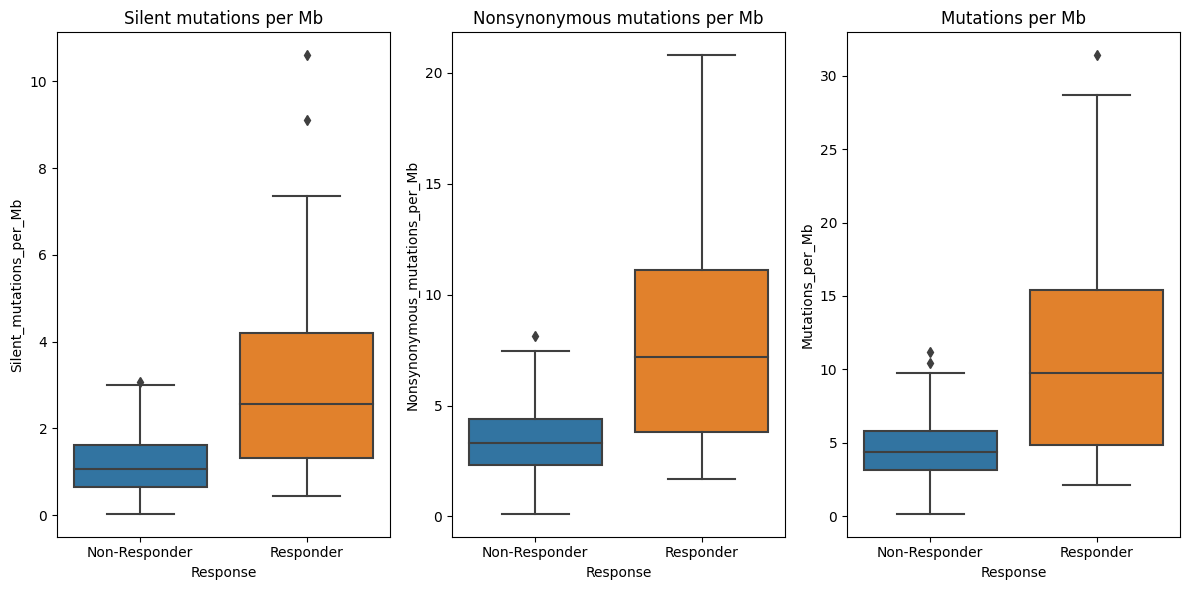

In [64]:
# Creating box plots
plt.figure(figsize=(12, 6))

# Silent mutations per Mb
plt.subplot(1, 3, 1)
sns.boxplot(x='Response', y='Silent_mutations_per_Mb', data=df1)
plt.title('Silent mutations per Mb')

# Nonsynonymous mutations per Mb
plt.subplot(1, 3, 2)
sns.boxplot(x='Response', y='Nonsynonymous_mutations_per_Mb', data=df1)
plt.title('Nonsynonymous mutations per Mb')

# Mutations per Mb
plt.subplot(1, 3, 3)
sns.boxplot(x='Response', y='Mutations_per_Mb', data=df1)
plt.title('Mutations per Mb')

plt.tight_layout()
plt.show()

In [65]:
#'Patient_ID',, 'Silent_mutations_per_Mb','Nonsynonymous_mutations_per_Mb','Mutations_per_Mb'
cols = ['Response','Tumor_Sample_Barcode', 'Nonsynonymous_mutations_per_Mb']
df3 = pd.merge(filtered_df, df1[cols], on=['Tumor_Sample_Barcode'], how='outer')

In [66]:
df3['VAF'] = df3['t_alt_count']/(df3['t_alt_count']+df3['t_ref_count'])

In [67]:
df3.head()

,Hugo_Symbol,Chromosome,Start_position,End_position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Protein_Change,t_alt_count,t_ref_count,Response,Nonsynonymous_mutations_per_Mb,VAF
0,ZFYVE9,1,52704470,52704470,Missense_Mutation,SNP,G,G,A,Patient-5-Tumor,Patient-5-Normal,p.D461N,6,125,Non-Responder,8.15,0.045802
1,MAP3K13,3,185181390,185181390,Missense_Mutation,SNP,G,G,A,Patient-5-Tumor,Patient-5-Normal,p.G444E,5,136,Non-Responder,8.15,0.035461
2,CSMD2,1,34083194,34083194,Nonsense_Mutation,SNP,C,C,A,Patient-5-Tumor,Patient-5-Normal,p.E1951*,9,67,Non-Responder,8.15,0.118421
3,KIDINS220,2,8930084,8930084,Missense_Mutation,SNP,A,A,T,Patient-5-Tumor,Patient-5-Normal,p.F516Y,5,241,Non-Responder,8.15,0.020325
4,KIAA0947,5,5462196,5462196,Missense_Mutation,SNP,G,G,A,Patient-5-Tumor,Patient-5-Normal,p.E917K,21,148,Non-Responder,8.15,0.124260


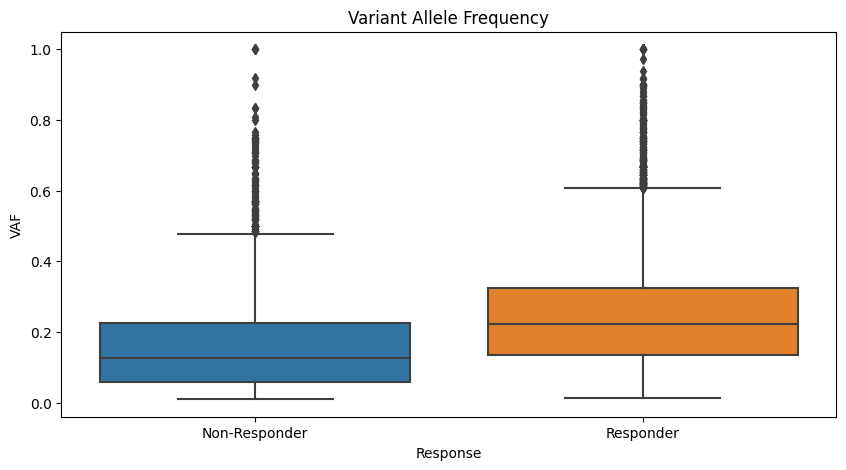

In [68]:
#Ideally close to 0.5 expected for a medium stage tumor assuming purity and
#sequencing quality and sample selectivity is good

plt.figure(figsize=(10, 5))

sns.boxplot(x='Response', y='VAF', data=df3)
plt.title('Variant Allele Frequency')


plt.show()

In [69]:
df3.nunique()

Hugo_Symbol                        6834
Chromosome                           46
Start_position                    10873
End_position                      10873
Variant_Classification                3
Variant_Type                          1
Reference_Allele                      4
Tumor_Seq_Allele1                     4
Tumor_Seq_Allele2                     4
Tumor_Sample_Barcode                 50
Matched_Norm_Sample_Barcode          50
Protein_Change                     9563
t_alt_count                         161
t_ref_count                         479
Response                              2
Nonsynonymous_mutations_per_Mb       47
VAF                                3741
dtype: int64

In [70]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11038 entries, 0 to 11037
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Hugo_Symbol                     11038 non-null  object 
 1   Chromosome                      11038 non-null  object 
 2   Start_position                  11038 non-null  int64  
 3   End_position                    11038 non-null  int64  
 4   Variant_Classification          11038 non-null  object 
 5   Variant_Type                    11038 non-null  object 
 6   Reference_Allele                11038 non-null  object 
 7   Tumor_Seq_Allele1               11038 non-null  object 
 8   Tumor_Seq_Allele2               11038 non-null  object 
 9   Tumor_Sample_Barcode            11038 non-null  object 
 10  Matched_Norm_Sample_Barcode     11038 non-null  object 
 11  Protein_Change                  11038 non-null  object 
 12  t_alt_count                     

In [71]:
#Most common gene mutations have multiple hits
df3.groupby(['Tumor_Sample_Barcode'])['Hugo_Symbol'].value_counts()

Tumor_Sample_Barcode  Hugo_Symbol
Patient-0-Tumor       TTN            4
                      MVP            3
                      DST            2
                      GPR115         2
                      MSLNL          2
                                    ..
Patient-9-Tumor       WDR48          1
                      ZC3H12A        1
                      ZCCHC10        1
                      ZFP41          1
                      ZNF80          1
Name: Hugo_Symbol, Length: 10406, dtype: int64

In [72]:
# df['Hugo_Symbol'] = df['Hugo_Symbol'].astype('str')
# df['Tumor_Sample_Barcode'] = df['Tumor_Sample_Barcode'].astype('str')
# df['Response'] = df['Response'].astype('str')

df_test = df3.drop_duplicates(['Tumor_Sample_Barcode','Hugo_Symbol'])

In [73]:
df_test.nunique()

Hugo_Symbol                        6834
Chromosome                           46
Start_position                    10290
End_position                      10290
Variant_Classification                3
Variant_Type                          1
Reference_Allele                      4
Tumor_Seq_Allele1                     4
Tumor_Seq_Allele2                     4
Tumor_Sample_Barcode                 50
Matched_Norm_Sample_Barcode          50
Protein_Change                     9086
t_alt_count                         159
t_ref_count                         471
Response                              2
Nonsynonymous_mutations_per_Mb       47
VAF                                3614
dtype: int64

In [74]:
from scipy.stats import fisher_exact

# Store results for each gene
gene_odds_val = []
gene_p_val = []

contingency_table = pd.crosstab(df_test['Hugo_Symbol'], df_test['Response'])
# Loop through each gene
for gene in contingency_table.index:
  # Create a 2x2 contingency table
  a = contingency_table.loc[gene]['Responder']
  b = contingency_table.loc[gene]['Non-Responder']
  c = 25-a
  d = 25-b

  dict_a = {'Responder':[a,c],
      'Non-Responder':[b,d]
      }

  df0 = pd.DataFrame(dict_a)
  df0.values

  # Perform Fisher's exact test
  #Odds ratio are greater than one or less than one or equal...
  #here we test equal

  odds_ratio, p_value = fisher_exact(df0)

  gene_odds_val.append(odds_ratio)
  gene_p_val.append(p_value)

#Most_Significantly_Enriched_Gene

In [75]:
#Since, we have very few positives we may not need FDR for this data

from statsmodels.stats.multitest import multipletests

dff4 = contingency_table
dff4 = dff4.assign(odd_val=gene_odds_val)
dff4 = dff4.assign(p_val=gene_p_val)

significant_genes = dff4[dff4['p_val'] < 0.05].index


#We cannot utilize odds_ratio due to zero frequency for some values

Most_significant_enriched_gene = dff4['p_val'].idxmin()
dff4.loc[Most_significant_enriched_gene]

# dff4.sort_values(by='p_val', inplace=True)

#Performing correction here
# dff4 = dff4.assign(FDR = multipletests(dff4['p_val'], method='fdr_bh')[1])
# # #We could check for 0.025 since two tailed, with further analysis
# significant_genes_corrected = dff4[dff4['FDR'] < 0.05].index
# significant_genes_corrected
# dff4.head()

Response
Non-Responder    0.000000
Responder        9.000000
odd_val               inf
p_val            0.001631
Name: ERCC2, dtype: float64

In [76]:
#Let's see the status of top 15 genes
dff4[dff4.index.isin(top_15_gene_mutation)]

Response,Non-Responder,Responder,odd_val,p_val
Hugo_Symbol,,,,
ERBB3,5,6,1.263158,1.000000
ERBB4,9,9,1.000000,1.000000
ERCC2,0,9,inf,0.001631
FAT4,3,6,2.315789,0.463490
FRG1B,5,5,1.000000,1.000000
KMT2D,5,8,1.882353,0.520195
MUC16,11,9,0.715909,0.773287
PDE4DIP,3,5,1.833333,0.701939
PIK3CA,3,6,2.315789,0.463490


**We know ERCC2 acts as a significant factor for the repair mechanism

*It provides instructions for making XPD protein, an essential part in TFIIH. Which is involved in transcription and repairing damaged DNA.

In [78]:
df_sig_en = dff4[dff4.index.isin(significant_genes)]
#Maybe KMT2C could be filtered out
#Our results didn't show any mutant genes significantly reduced
df_sig_en

Response,Non-Responder,Responder,odd_val,p_val
Hugo_Symbol,,,,
AKAP9,0,6,inf,0.022290
ERCC2,0,9,inf,0.001631
HECTD1,0,6,inf,0.022290
HERC1,0,6,inf,0.022290
KMT2C,1,7,9.333333,0.048797
MACF1,0,6,inf,0.022290
MROH2B,0,6,inf,0.022290


#Scatter Plot with most significant genes vs no. of patients

<ipython-input-79-261c41a46879>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sig_en['Mutants'] = df_sig_en['Non-Responder'] + df_sig_en['Responder']


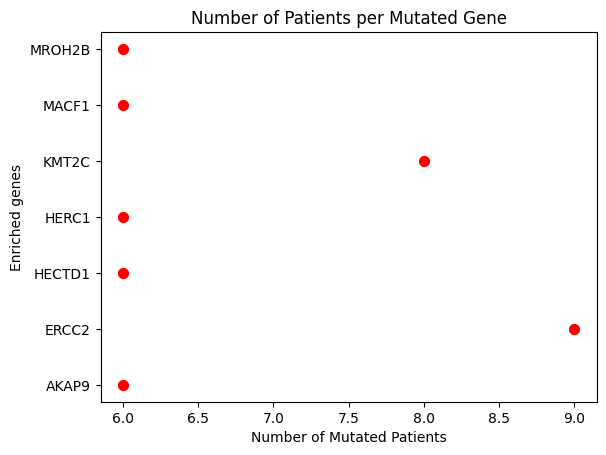

In [79]:
df_sig_en['Mutants'] = df_sig_en['Non-Responder'] + df_sig_en['Responder']
plt.scatter(df_sig_en['Mutants'], df_sig_en.index, color='red',s = 50)
plt.xlabel('Number of Mutated Patients')
plt.ylabel('Enriched genes')
# plt.legend()
plt.title('Number of Patients per Mutated Gene')
plt.show()

In [80]:
df_sig_en = df_sig_en.reset_index()
df_sig_en

Response,Hugo_Symbol,Non-Responder,Responder,odd_val,p_val,Mutants
0,AKAP9,0,6,inf,0.022290,6
1,ERCC2,0,9,inf,0.001631,9
2,HECTD1,0,6,inf,0.022290,6
3,HERC1,0,6,inf,0.022290,6
4,KMT2C,1,7,9.333333,0.048797,8
5,MACF1,0,6,inf,0.022290,6
6,MROH2B,0,6,inf,0.022290,6


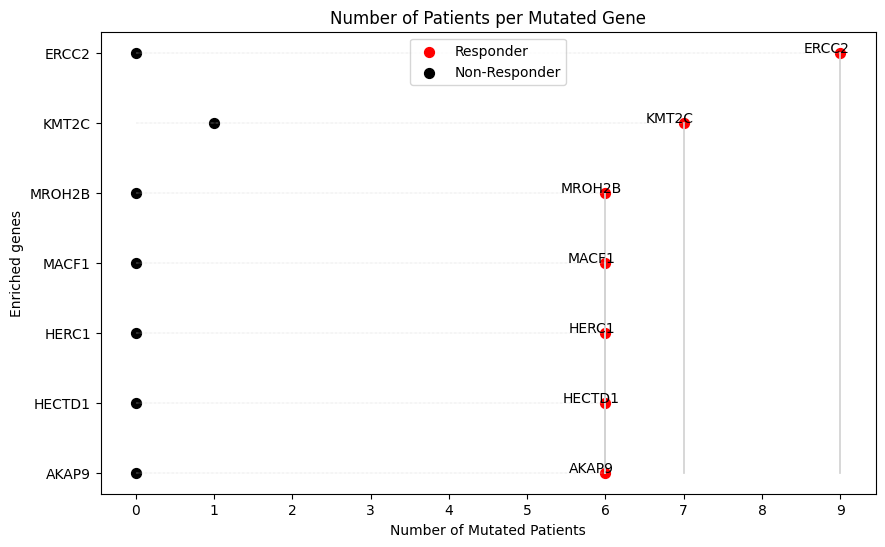

In [81]:
plt.figure(figsize=(10, 6))

# handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, linestyle='-'),
#            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, linestyle='-')]
# labels = ['Responder', 'Non-Responder']

# plt.legend(handles=handles, labels=labels, loc='center left', bbox_to_anchor=(1, 0.5))

df_sig_en.sort_values(by='Mutants', ascending=True, inplace=True)

for i, txt in enumerate(df_sig_en['Hugo_Symbol']):
    plt.annotate(txt, (df_sig_en['Responder'].iloc[i], df_sig_en['Hugo_Symbol'].iloc[i]), textcoords="offset points", xytext=(-10,0), ha='center')

plt.scatter(df_sig_en['Responder'], df_sig_en['Hugo_Symbol'], color='red',s = 50, label='Responder')
plt.scatter(df_sig_en['Non-Responder'], df_sig_en['Hugo_Symbol'], color='black', s=50, label='Non-Responder')

for i in range(len(df_sig_en)):
    plt.plot([df_sig_en['Responder'].iloc[i], df_sig_en['Responder'].iloc[i]], [0, i], color='lightgray', linestyle='-', linewidth=1.25)
    plt.plot([0, df_sig_en['Responder'].iloc[i]], [i,i], color='lightgray', linestyle='-.', linewidth=0.3)

plt.xlabel('Number of Mutated Patients')
plt.xticks(np.arange(0, 10, step=1))
plt.ylabel('Enriched genes')
plt.legend(loc='upper center')
plt.title('Number of Patients per Mutated Gene')
plt.show()

#6) wild-type versus mutant

*wrt to most significant enriched gene ERCC2

* How many wild-type vs mutant samples?

* Plot the number of nonsynonymous mutations per megabase in the mutant vs. wild-type samples.

* Is there a significant difference in the number of mutations between the two groups?

In [103]:
#Number of wild-type vs Mutant for ERCC2
#9 Responder patients are mutant and rest 41 are wild-type
print(df_sig_en[df_sig_en['Hugo_Symbol']==Most_significant_enriched_gene]['Mutants'])

1    9
Name: Mutants, dtype: int64


In [97]:
ercc2_p_list = df3[df3['Hugo_Symbol']=='ERCC2']['Tumor_Sample_Barcode'].unique()
ercc2_NP_list = df1[~df1['Tumor_Sample_Barcode'].isin(ercc2_p_list)]['Tumor_Sample_Barcode'].tolist()

len(ercc2_NP_list)

41

In [102]:
len(ercc2_p_list)

9

In [105]:
ercc2_mut_list = []
ercc2_mut_list.append(df1[df1['Tumor_Sample_Barcode'].isin(ercc2_p_list)].Nonsynonymous_mutations_per_Mb.values)
ercc2_NPmut_list = []
ercc2_NPmut_list.append(df1[df1['Tumor_Sample_Barcode'].isin(ercc2_NP_list)].Nonsynonymous_mutations_per_Mb.values)

In [107]:
ercc2_NPmut_list[0]

array([ 6.77,  6.14,  2.84,  5.  ,  8.15,  6.69,  2.64,  4.48,  0.12,
        9.16,  3.79,  3.1 ,  4.39, 19.3 ,  4.14,  4.25,  1.83,  1.84,
        7.44,  2.61, 20.8 ,  3.34,  2.1 ,  2.87,  7.18,  2.76,  1.69,
        8.47,  0.89,  6.  ,  3.34,  4.05,  3.53,  3.88, 11.1 ,  3.33,
        4.19,  2.84,  2.33,  2.27,  5.6 ])

In [87]:
df1['Type'] = df1['Tumor_Sample_Barcode'].apply(lambda row: 'Mutant' if row in ercc2_p_list else 'Wild_Type')

In [88]:
df1['Type'].value_counts()

Wild_Type    41
Mutant        9
Name: Type, dtype: int64

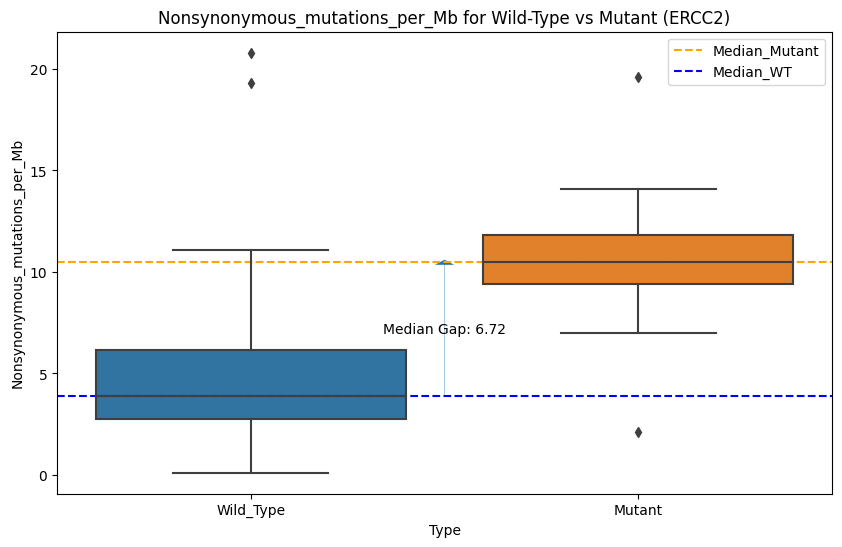

In [89]:
#Lets check for outliers and general distribution
import statistics

plt.figure(figsize=(10, 6))

plt.axhline(y=statistics.median(ercc2_mut_list[0]) , color='orange', linestyle='--', label='Median_Mutant')
plt.axhline(y=statistics.median(ercc2_NPmut_list[0]) , color='blue', linestyle='--', label='Median_WT')

plt.arrow(0.5, 3.88, 0, 6.72, shape='full', lw=0, length_includes_head=True, head_length = 0.25, head_width=0.05)
plt.text(0.5, 7, f'Median Gap: {6.72:.2f}', color='black', horizontalalignment='center')


sns.boxplot(x='Type', y='Nonsynonymous_mutations_per_Mb', data=df1)
plt.title('Nonsynonymous_mutations_per_Mb for Wild-Type vs Mutant (ERCC2)')
plt.legend()
plt.show()


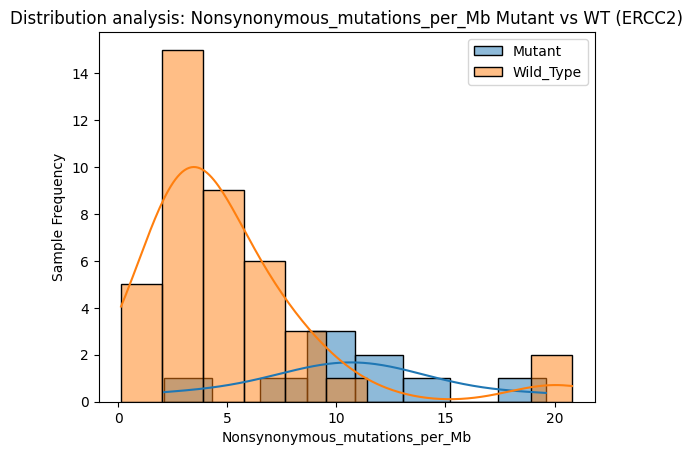

In [108]:
sns.histplot(ercc2_mut_list[0], label='Mutant', kde = True)
sns.histplot(ercc2_NPmut_list[0], label='Wild_Type', kde = True)

plt.xlabel('Nonsynonymous_mutations_per_Mb')
plt.ylabel('Sample Frequency')
plt.title('Distribution analysis: Nonsynonymous_mutations_per_Mb Mutant vs WT (ERCC2)')
plt.legend()
plt.show()

* Since our data isn't exactly normal and fails normality test, lets go with Mann-Whitney U test.   


In [91]:
from scipy.stats import shapiro, mannwhitneyu

# Shapiro-Wilk test for normality
_, p_value1 = shapiro(ercc2_mut_list[0])
_, p_value2 = shapiro(ercc2_NPmut_list[0])

# Print results
print(f'Shapiro-Wilk p-value for Mutant: {p_value1}')
print(f'Shapiro-Wilk p-value for Wild-type: {p_value2}')

Shapiro-Wilk p-value for Mutant: 0.7412866950035095
Shapiro-Wilk p-value for Wild-type: 4.251704979196802e-07


In [92]:
#We could remove the outliers present in the boxplot if needed
#But ideally only after holistic analysis of patient data
#We could try data transformation as well but not needed at the present

statistic, p_value = mannwhitneyu(ercc2_mut_list[0], ercc2_NPmut_list[0])
print(statistic, p_value)

309.5 0.0016661236107742337


#without outliers

In [93]:
data = ercc2_mut_list[0]
Q3 = np.quantile(data, 0.75)
Q1 = np.quantile(data, 0.25)
IQR = Q3 - Q1

lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
ercc2_mut_list = [x for x in data if ((x > lower_range) & (x < upper_range))]

data = ercc2_NPmut_list[0]
Q3 = np.quantile(data, 0.75)
Q1 = np.quantile(data, 0.25)
IQR = Q3 - Q1

lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
ercc2_NPmut_list = [x for x in data if ((x > lower_range) & (x < upper_range))]

In [94]:
# Shapiro-Wilk test for normality
_, p_value1 = shapiro(ercc2_mut_list)
_, p_value2 = shapiro(ercc2_NPmut_list)

# Print results
print(f'Shapiro-Wilk p-value for Mutant: {p_value1}')
print(f'Shapiro-Wilk p-value for Wild-type: {p_value2}')

statistic, p_value = mannwhitneyu(ercc2_mut_list, ercc2_NPmut_list)
print(statistic, p_value)

Shapiro-Wilk p-value for Mutant: 0.9423905611038208
Shapiro-Wilk p-value for Wild-type: 0.034832604229450226
264.0 0.00010270783991648893


In [95]:
#STILL Significantly different and not normal distribution

#We conclude:
* The difference in non-synonymous mutations in the two groups segregated by mutant and wild-type of ERCC2 gene (most significantly enriched gene) is significantly different due to "p<0.05".
* The 7 mutated genes discovered are significantly associated with the treatment response.
* Use Bioconductor package like maftools when possible :D

#Conclusions and Improvements in Analysis

* The VAF of both the groups, responders and non-responders is below 0.5.
In diploid species ideally close to 0.5 expected for a medium stage tumor assuming purity and sequencing quality and region selectivity is good.
Indiviual patient's VAF or smaller groups might give more specific insights and an understanding of the heterogenous mutations level.
Based on the cancer type and location, such as colorectal cancer and with some more analysis, we may be able to comment that the tumor is in initial stages of development with Darwinian evolution due to considerable intratumoral heterogeneity, arising from multiple sub-clonal mutations at initial stages (Saito et al. 2018) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6056524/

  We may be able to make a comment that a considerable portion of mutations are passenger mutations and hence are not being selectively favoured in general and resulting in low VAF in the sample population.
  The impact of treatment on the VAF of mutation at the gene level in the groups cannot be significantly associated.
  We can potentially form more hypothesis and conclusions.

* It can be concluded that the treatment resulted in enriching each of the 7 mutant genes in a subset of responder patients (statistically significant in sample population, responder vs non-responder), implying resistance generated by subclonal mutations, at the sample collection time, within those patients.
The treatment's impact in reducing mutants at gene level was not significantly considerable for any of the patients. (Perhaps one should perform one-tailed t-test for this to strengthen argument)

* It would seem total mutation load post-treatment may have been one of the factors for classifying Response and Non-Response Patients for which the argument can be strengthened with a t-test/Mann-Whitney U test.

* In the gene analysis with most mutations and general presence per patient we found that these 5 genes SPEN, KMT2C, ZNF91, DST, TYRO3 are dominant in certain groups of patients and can be further evaluated for more information about any unique mutational signatures, potentially de-novo discoveries and personalized treatment recommendations.

* In statistical enrichment test post-treatment, we might be able to add some weightage to consider number of mutations level present in each gene in Response or Non-response patients.
We could include at Variance Allele Frequency (VAF) to filter our data and also in our analysis at different levels such as at mutation per gene per patient per group. In some cases, it might even indicate potential germ-line mutations being present.

* ERCC2 was estimated to the most significantly enriched mutant gene being present in 9 Responders and 0 Non-Responders. It acts as a significant factor for the repair mechanism by provides instructions for making XPD protein, an essential part in TFIIH. Which is involved in transcription and repairing damaged DNA. Hence, a basis for multiple cancer types and a potential driver gene. (https://medlineplus.gov/genetics/gene/ercc2/)
The number of mutant sample observed is 9 and remaining patients are dominantly considered to have wild-type copy of the gene, hence 41 wild-type samples.

* The difference in non-synonymous mutations in the two groups segregated by mutant and wild-type of ERCC2 gene (most significantly enriched gene) is statistically significant due to "p < 0.05". Further potential importance/significane of ERCC2 gene in non-synonymous mutation load in patients can be done with one-tailed Mann-Whitney U test at the gene level (individual gene based mutations, link to other passenger and driver mutations in same and other genes, etc.) on different combinations of sample population based on requirements.

* We could apply a range of Machine Learning models in supervised and unsupervised manner above, based on our specific query and identify unique insights and more complex relations among the features at multiple scales/levels (eg: patient, groups, etc.).

* There are still a number of analysis we could perform, including locus based mutations analysis to identify hotspots and driver mutations. We could perform functional and pathway analysis to understand the implications of mutations and their significance and other relevant mutations linked with them. Identifying gene-pair co-occurrence frequency. Perform analysis with mutation tables such as co-onco plots. Observe at entire protein change across sample population per gene and per patient/group and compare it with reference datasets.
Using methods like Gene Set Enrichment Analysis to get analysis with a broader picture to analyze patterns and understand the functional significance of gene expression. Adding further clinical data.
We could utilize mutational signatures and understand further about the cancer's potential evolution and detect its subtype.
Utilize already referenced and filtered data such as from "TCGA" specific/similar/even contrasting to our case and identify new insights and hypothesis and accelerate our analysis and discovery.
We could also perform further analysis based on germ-line (driver) mutations vs somatic (driver) mutations to further increase our predictive and causal analysis, by comparing germ (ideally) cells with tumor cell samples and adapt and improve our treatment results.

* Lastly, after having certain amount of data on sample population for different cancer types (such mutational signatures, mutation types, omics data and other important features), we need to shift from real-time situational analytics and basic predictive analytics to real-time advanced predictive analytics utilizing Artificial Intelligence (Machine Learning + Deep Learning + Natural Language Processing + Computer Vision + Reinforcement Learning + Geometric Deep Learning, and further advancements) enabling significant enhancement in knowledge and deeper insights, cheaper and automated base treatment solutions and analysis, treating relapses and clonal and sub-clonal driver mutations before they may even occur and several other benefits.